# Cálculo de Ganho de Informação - Dataset SVM

Este notebook implementa o cálculo puro do **Ganho de Informação** (Information Gain) para o dataset SVM do KubeMon.

## Teoria do Ganho de Informação

O Ganho de Informação é uma medida baseada na teoria da informação que quantifica a redução na entropia (incerteza) de uma variável target após observar uma feature específica.

**Fórmula:**
```
IG(S, A) = H(S) - Σ(|Sv|/|S|) × H(Sv)
```

Onde:
- `IG(S, A)` = Ganho de Informação do conjunto S para a feature A
- `H(S)` = Entropia do conjunto S
- `Sv` = Subconjunto de S onde a feature A tem valor v
- `H(Sv)` = Entropia do subconjunto Sv

In [1]:
# Importações necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import log2
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Configurações de visualização
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

print("📚 Bibliotecas carregadas com sucesso!")
print("🎯 Pronto para calcular Ganho de Informação")

📚 Bibliotecas carregadas com sucesso!
🎯 Pronto para calcular Ganho de Informação


## 1. Implementação das Funções de Ganho de Informação

In [11]:
def calcular_entropia(labels):
    """
    Calcula a entropia de uma lista de labels.
    
    Entropia H(S) = -Σ p(i) × log2(p(i))
    onde p(i) é a proporção da classe i no conjunto S
    """
    if len(labels) == 0:
        return 0
    
    # Contar ocorrências de cada classe
    counts = Counter(labels)
    total = len(labels)
    
    # Calcular entropia
    entropy = 0
    for count in counts.values():
        if count > 0:
            probability = count / total
            entropy -= probability * log2(probability)
    
    return entropy


def discretizar_feature_continua(values, n_bins=10, method='equal_frequency'):
    """
    Discretiza uma feature contínua em bins para cálculo do ganho de informação.
    
    Args:
        values: array com os valores da feature
        n_bins: número de bins
        method: 'equal_width' ou 'equal_frequency'
    """
    if method == 'equal_frequency':
        # Bins com aproximadamente o mesmo número de observações
        return pd.qcut(values, q=n_bins, duplicates='drop', labels=False)
    else:
        # Bins com mesma largura
        return pd.cut(values, bins=n_bins, duplicates='drop', labels=False)


def calcular_ganho_informacao(feature_values, target_values, n_bins=10):
    """
    Calcula o Ganho de Informação de uma feature em relação ao target.
    
    Args:
        feature_values: valores da feature
        target_values: valores do target
        n_bins: número de bins para discretização (se necessário)
    
    Returns:
        float: Ganho de Informação
    """
    # Remover valores NaN
    mask = ~(pd.isna(feature_values) | pd.isna(target_values))
    feature_clean = feature_values[mask]
    target_clean = target_values[mask]
    
    if len(feature_clean) == 0:
        return 0
    
    # Calcular entropia inicial do target
    entropia_inicial = calcular_entropia(target_clean)
    
    # Discretizar feature se for contínua
    valores_unicos = len(np.unique(feature_clean))
    if valores_unicos > 20:  # Se tem muitos valores únicos, discretizar
        try:
            feature_discretizada = discretizar_feature_continua(feature_clean, n_bins)
        except:
            # Se falhar a discretização, usar valores originais
            feature_discretizada = feature_clean
    else:
        feature_discretizada = feature_clean
    
    # Calcular entropia condicional
    entropia_condicional = 0
    total_samples = len(feature_discretizada)
    
    # Para cada valor único da feature
    for valor in np.unique(feature_discretizada):
        if pd.isna(valor):
            continue
            
        # Subset onde feature = valor
        mask_valor = (feature_discretizada == valor)
        target_subset = target_clean[mask_valor]
        
        if len(target_subset) > 0:
            # Peso do subset
            peso = len(target_subset) / total_samples
            
            # Entropia do subset
            entropia_subset = calcular_entropia(target_subset)
            
            # Adicionar à entropia condicional
            entropia_condicional += peso * entropia_subset
    
    # Ganho de Informação = Entropia inicial - Entropia condicional
    ganho_informacao = entropia_inicial - entropia_condicional
    
    return max(0, ganho_informacao)  # Garantir que não seja negativo


print("✅ Funções de Ganho de Informação implementadas!")
print("\n🔧 Funções disponíveis:")
print("   • calcular_entropia(labels)")
print("   • discretizar_feature_continua(values, n_bins, method)")
print("   • calcular_ganho_informacao(feature_values, target_values, n_bins)")

✅ Funções de Ganho de Informação implementadas!

🔧 Funções disponíveis:
   • calcular_entropia(labels)
   • discretizar_feature_continua(values, n_bins, method)
   • calcular_ganho_informacao(feature_values, target_values, n_bins)


## 2. Carregamento do Dataset

In [9]:
# Carregar o dataset SVM
print("📂 Carregando dataset svm.csv...")

try:
    # Tentar carregar o dataset completo
    df = pd.read_csv('svm.csv')
    print(f"✅ Dataset carregado com sucesso!")
    print(f"📊 Dimensões: {df.shape[0]:,} linhas × {df.shape[1]} colunas")
    
except FileNotFoundError:
    print("❌ Arquivo 'svm.csv' não encontrado no diretório atual")
    print("💡 Certifique-se de que o arquivo está no mesmo diretório do notebook")
    df = None
    
except Exception as e:
    print(f"❌ Erro ao carregar o dataset: {e}")
    print("🔄 Tentando carregar uma amostra...")
    try:
        df = pd.read_csv('svm.csv', nrows=50000)
        print(f"✅ Amostra carregada: {df.shape[0]:,} linhas")
    except:
        df = None
        print("❌ Falha ao carregar amostra")

if df is not None:
    # Informações básicas do dataset
    print(f"\n📋 Informações do Dataset:")
    print(f"   • Tipos de dados: {df.dtypes.value_counts().to_dict()}")
    print(f"   • Valores ausentes: {df.isnull().sum().sum():,}")
    print(f"   • Memória utilizada: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    
    # Verificar coluna target
    if 'target' in df.columns:
        target_col = 'target'
        print(f"   • Coluna target: '{target_col}'")
        print(f"   • Classes: {df[target_col].value_counts().to_dict()}")
    else:
        print("⚠️  Coluna 'target' não encontrada. Procurando alternativas...")
        possible_targets = [col for col in df.columns if any(word in col.lower() 
                           for word in ['target', 'class', 'label', 'y'])]
        if possible_targets:
            target_col = possible_targets[0]
            print(f"   • Usando coluna: '{target_col}'")
        else:
            target_col = None
            print("❌ Nenhuma coluna de target identificada")
    
    # Mostrar primeiras linhas
    print(f"\n👀 Primeiras 3 linhas:")
    display(df.head(3))
else:
    target_col = None

📂 Carregando dataset svm.csv...
✅ Dataset carregado com sucesso!
📊 Dimensões: 80,648 linhas × 126 colunas

📋 Informações do Dataset:
   • Tipos de dados: {dtype('float64'): 122, dtype('O'): 3, dtype('int64'): 1}
   • Valores ausentes: 0
   • Memória utilizada: 89.35 MB
   • Coluna target: 'target'
   • Classes: {'interf': 45660, 'normal': 34988}

👀 Primeiras 3 linhas:


,mean_os_cpu_ctx_switches,mean_os_cpu_guest,mean_os_cpu_guest_nice,mean_os_cpu_idle,mean_os_cpu_interrupts,mean_os_cpu_iowait,mean_os_cpu_irq,mean_os_cpu_nice,mean_os_cpu_soft_interrupts,mean_os_cpu_softirq,...,mean_container_net_tx_bytes,mean_container_net_tx_carrier,mean_container_net_tx_colls,mean_container_net_tx_compressed,mean_container_net_tx_drop,mean_container_net_tx_errs,mean_container_net_tx_fifo,mean_container_net_tx_packets,iteration,target
0,22270.0,0.0,0.0,34.31,15074.0,0.0,0.0,0.0,6218.0,0.08,...,2346.2,0.0,0.0,0.0,0.0,0.0,0.0,15.8,0,normal
1,26634.0,0.0,0.0,26.51,22188.0,0.0,0.0,0.0,14863.0,0.98,...,10269243.6,0.0,0.0,0.0,0.0,0.0,0.0,475.8,0,normal
2,20470.0,0.0,0.0,39.31,18464.0,0.0,0.0,0.0,17564.0,1.59,...,48509858.2,0.0,0.0,0.0,0.0,0.0,0.0,1649.8,0,normal


## 3. Pré-processamento para Ganho de Informação

In [12]:
if df is not None and target_col is not None:
    print("🔧 Preparando dados para cálculo do Ganho de Informação...")
    
    # Identificar features numéricas (excluindo colunas de identificação)
    colunas_excluir = ['os_timestamp', 'node_name', 'iteration', target_col]
    colunas_excluir = [col for col in colunas_excluir if col in df.columns]
    
    # Selecionar apenas features numéricas
    features_numericas = df.select_dtypes(include=[np.number]).columns.tolist()
    features_para_analise = [col for col in features_numericas if col not in colunas_excluir]
    
    print(f"📊 Features para análise:")
    print(f"   • Total de colunas: {df.shape[1]}")
    print(f"   • Colunas excluídas: {len(colunas_excluir)} {colunas_excluir}")
    print(f"   • Features numéricas: {len(features_numericas)}")
    print(f"   • Features para análise: {len(features_para_analise)}")
    
    # Preparar dados
    X = df[features_para_analise].copy()
    y = df[target_col].copy()
    
    # Informações sobre o target
    target_info = y.value_counts()
    entropia_target = calcular_entropia(y.dropna())
    
    print(f"\n🎯 Informações do Target:")
    print(f"   • Distribuição de classes:")
    for classe, count in target_info.items():
        percentual = (count / len(y)) * 100
        print(f"     - {classe}: {count:,} ({percentual:.1f}%)")
    print(f"   • Entropia inicial: {entropia_target:.6f} bits")
    
    # Verificar valores ausentes
    valores_ausentes_X = X.isnull().sum()
    valores_ausentes_y = y.isnull().sum()
    
    if valores_ausentes_X.sum() > 0:
        print(f"\n⚠️  Valores ausentes em features: {valores_ausentes_X.sum():,}")
        features_com_na = valores_ausentes_X[valores_ausentes_X > 0]
        print(f"   • Features afetadas: {len(features_com_na)}")
        print(f"   • Pior caso: {features_com_na.max():,} valores ausentes")
    
    if valores_ausentes_y > 0:
        print(f"   • Valores ausentes no target: {valores_ausentes_y}")
    
    print(f"\n✅ Dados preparados com sucesso!")
    print(f"   • Shape final: X={X.shape}, y={len(y)}")
    
else:
    print("❌ Não é possível prosseguir sem dataset ou coluna target")
    X, y = None, None

🔧 Preparando dados para cálculo do Ganho de Informação...
📊 Features para análise:
   • Total de colunas: 126
   • Colunas excluídas: 4 ['os_timestamp', 'node_name', 'iteration', 'target']
   • Features numéricas: 123
   • Features para análise: 122

🎯 Informações do Target:
   • Distribuição de classes:
     - interf: 45,660 (56.6%)
     - normal: 34,988 (43.4%)
   • Entropia inicial: 0.987332 bits

✅ Dados preparados com sucesso!
   • Shape final: X=(80648, 122), y=80648


## 4. Cálculo do Ganho de Informação para Todas as Features

In [14]:
if X is not None and y is not None:
    print("⚡ Calculando Ganho de Informação para todas as features...")
    print(f"📊 Processando {len(features_para_analise)} features...")
    
    # Lista para armazenar resultados
    resultados_ganho = []
    
    # Calcular ganho de informação para cada feature
    for i, feature in enumerate(features_para_analise):
        # Progresso
        if (i + 1) % 20 == 0 or i == 0:
            print(f"   🔄 Processando feature {i+1:3d}/{len(features_para_analise)}: {feature[:50]}...")
        
        try:
            # Calcular ganho de informação
            ganho = calcular_ganho_informacao(
                feature_values=X[feature].values,
                target_values=y.values,
                n_bins=10
            )
            
            # Calcular estatísticas adicionais da feature
            valores_validos = X[feature].dropna()
            if len(valores_validos) > 0:
                feature_stats = {
                    'feature': feature,
                    'information_gain': ganho,
                    'valores_unicos': valores_validos.nunique(),
                    'valores_ausentes': X[feature].isnull().sum(),
                    'percentual_ausentes': (X[feature].isnull().sum() / len(X)) * 100,
                    'min_valor': valores_validos.min(),
                    'max_valor': valores_validos.max(),
                    'media': valores_validos.mean(),
                    'desvio_padrao': valores_validos.std()
                }
            else:
                feature_stats = {
                    'feature': feature,
                    'information_gain': 0,
                    'valores_unicos': 0,
                    'valores_ausentes': len(X),
                    'percentual_ausentes': 100.0,
                    'min_valor': np.nan,
                    'max_valor': np.nan,
                    'media': np.nan,
                    'desvio_padrao': np.nan
                }
            
            resultados_ganho.append(feature_stats)
            
        except Exception as e:
            print(f"      ❌ Erro na feature '{feature}': {str(e)[:50]}...")
            # Adicionar resultado com ganho zero em caso de erro
            resultados_ganho.append({
                'feature': feature,
                'information_gain': 0,
                'valores_unicos': 0,
                'valores_ausentes': len(X),
                'percentual_ausentes': 100.0,
                'min_valor': np.nan,
                'max_valor': np.nan,
                'media': np.nan,
                'desvio_padrao': np.nan
            })
    
    # Converter para DataFrame e ordenar por ganho de informação
    df_resultados = pd.DataFrame(resultados_ganho)
    df_resultados = df_resultados.sort_values('information_gain', ascending=False).reset_index(drop=True)
    
    print(f"\n✅ Cálculo concluído!")
    print(f"   • Features processadas: {len(df_resultados)}")
    print(f"   • Features com IG > 0: {(df_resultados['information_gain'] > 0).sum()}")
    print(f"   • Maior ganho de informação: {df_resultados['information_gain'].max():.6f}")
    print(f"   • Ganho médio: {df_resultados['information_gain'].mean():.6f}")
    
else:
    print("❌ Não é possível calcular ganho de informação sem dados preparados")
    df_resultados = None

⚡ Calculando Ganho de Informação para todas as features...
📊 Processando 122 features...
   🔄 Processando feature   1/122: mean_os_cpu_ctx_switches...
   🔄 Processando feature  20/122: mean_os_disk_io_ticks...
   🔄 Processando feature  40/122: mean_os_mem_pgreuse...
   🔄 Processando feature  60/122: mean_process_disk_write_count...
   🔄 Processando feature  80/122: mean_process_net_tx_drop...
   🔄 Processando feature 100/122: mean_container_mem_mapped_file...
   🔄 Processando feature 120/122: mean_container_net_tx_errs...

✅ Cálculo concluído!
   • Features processadas: 122
   • Features com IG > 0: 69
   • Maior ganho de informação: 0.775553
   • Ganho médio: 0.058249


## 5. Análise dos Resultados

In [15]:
if df_resultados is not None:
    print("📊 ANÁLISE DOS RESULTADOS - GANHO DE INFORMAÇÃO")
    print("="*60)
    
    # Estatísticas gerais
    print(f"\n📈 ESTATÍSTICAS GERAIS:")
    stats = df_resultados['information_gain'].describe()
    print(f"   • Mínimo:           {stats['min']:.8f}")
    print(f"   • Quartil 25%:      {stats['25%']:.8f}")
    print(f"   • Mediana:          {stats['50%']:.8f}")
    print(f"   • Média:            {stats['mean']:.8f}")
    print(f"   • Quartil 75%:      {stats['75%']:.8f}")
    print(f"   • Máximo:           {stats['max']:.8f}")
    print(f"   • Desvio Padrão:    {stats['std']:.8f}")
    
    # Top 20 features
    print(f"\n🏆 TOP 20 FEATURES COM MAIOR GANHO DE INFORMAÇÃO:")
    print(f"{'Pos':<3} | {'Feature':<50} | {'Ganho Info':<12} | {'Val.Únicos':<10}")
    print(f"{'-'*3}|{'-'*52}|{'-'*13}|{'-'*11}")
    
    top_20 = df_resultados.head(20)
    for idx, row in top_20.iterrows():
        pos = idx + 1
        feature = row['feature'][:48] + '...' if len(row['feature']) > 48 else row['feature']
        ganho = f"{row['information_gain']:.8f}"
        unicos = f"{row['valores_unicos']:.0f}" if not pd.isna(row['valores_unicos']) else 'N/A'
        
        print(f"{pos:<3} | {feature:<50} | {ganho:<12} | {unicos:<10}")
    
    # Análise por faixas de ganho
    print(f"\n📋 ANÁLISE POR FAIXAS DE GANHO DE INFORMAÇÃO:")
    
    faixas = [
        (0.1, "Muito Alto"),
        (0.05, "Alto"), 
        (0.01, "Médio"),
        (0.005, "Baixo"),
        (0.001, "Muito Baixo"),
        (0, "Zero")
    ]
    
    for threshold, categoria in faixas:
        if threshold > 0:
            count = (df_resultados['information_gain'] >= threshold).sum()
            count_prev = (df_resultados['information_gain'] >= faixas[faixas.index((threshold, categoria))-1][0]).sum() if faixas.index((threshold, categoria)) > 0 else len(df_resultados)
            count_faixa = count_prev - count if faixas.index((threshold, categoria)) > 0 else count
        else:
            count_faixa = (df_resultados['information_gain'] == 0).sum()
        
        percentual = (count_faixa / len(df_resultados)) * 100
        print(f"   • {categoria:12s}: {count_faixa:4d} features ({percentual:5.1f}%)")
    
    # Análise por categoria de métrica
    print(f"\n🔍 ANÁLISE POR CATEGORIA DE MÉTRICA:")
    
    categorias = {
        'CPU': [row for _, row in df_resultados.iterrows() if 'cpu' in row['feature'].lower()],
        'Memória': [row for _, row in df_resultados.iterrows() if 'mem' in row['feature'].lower()],
        'Disco': [row for _, row in df_resultados.iterrows() if 'disk' in row['feature'].lower()],
        'Rede': [row for _, row in df_resultados.iterrows() if 'net' in row['feature'].lower()],
        'Container': [row for _, row in df_resultados.iterrows() if 'container' in row['feature'].lower()],
        'Processo': [row for _, row in df_resultados.iterrows() if 'process' in row['feature'].lower()]
    }
    
    for categoria, rows in categorias.items():
        if rows:
            ganhos = [row['information_gain'] for row in rows]
            melhor_feature = max(rows, key=lambda x: x['information_gain'])
            
            print(f"   • {categoria:12s}: {len(rows):3d} features | Ganho médio: {np.mean(ganhos):.6f} | "
                  f"Max: {max(ganhos):.6f}")
            print(f"     └─ Melhor: {melhor_feature['feature'][:60]}")
    
    print(f"\n✅ Análise de resultados concluída!")

else:
    print("❌ Não há resultados para analisar")

📊 ANÁLISE DOS RESULTADOS - GANHO DE INFORMAÇÃO

📈 ESTATÍSTICAS GERAIS:
   • Mínimo:           0.00000000
   • Quartil 25%:      0.00000000
   • Mediana:          0.00135029
   • Média:            0.05824908
   • Quartil 75%:      0.06213106
   • Máximo:           0.77555338
   • Desvio Padrão:    0.12176280

🏆 TOP 20 FEATURES COM MAIOR GANHO DE INFORMAÇÃO:
Pos | Feature                                            | Ganho Info   | Val.Únicos
---|----------------------------------------------------|-------------|-----------
1   | mean_os_net_bytes_sent                             | 0.77555338   | 12259     
2   | mean_os_net_num_connections                        | 0.70347912   | 54        
3   | mean_os_net_packets_sent                           | 0.41103506   | 17        
4   | mean_os_net_packets_recv                           | 0.31890720   | 26        
5   | mean_os_net_bytes_recv                             | 0.29697600   | 434       
6   | mean_os_cpu_system                        

## 6. Visualizações

📊 Gerando visualizações dos resultados...


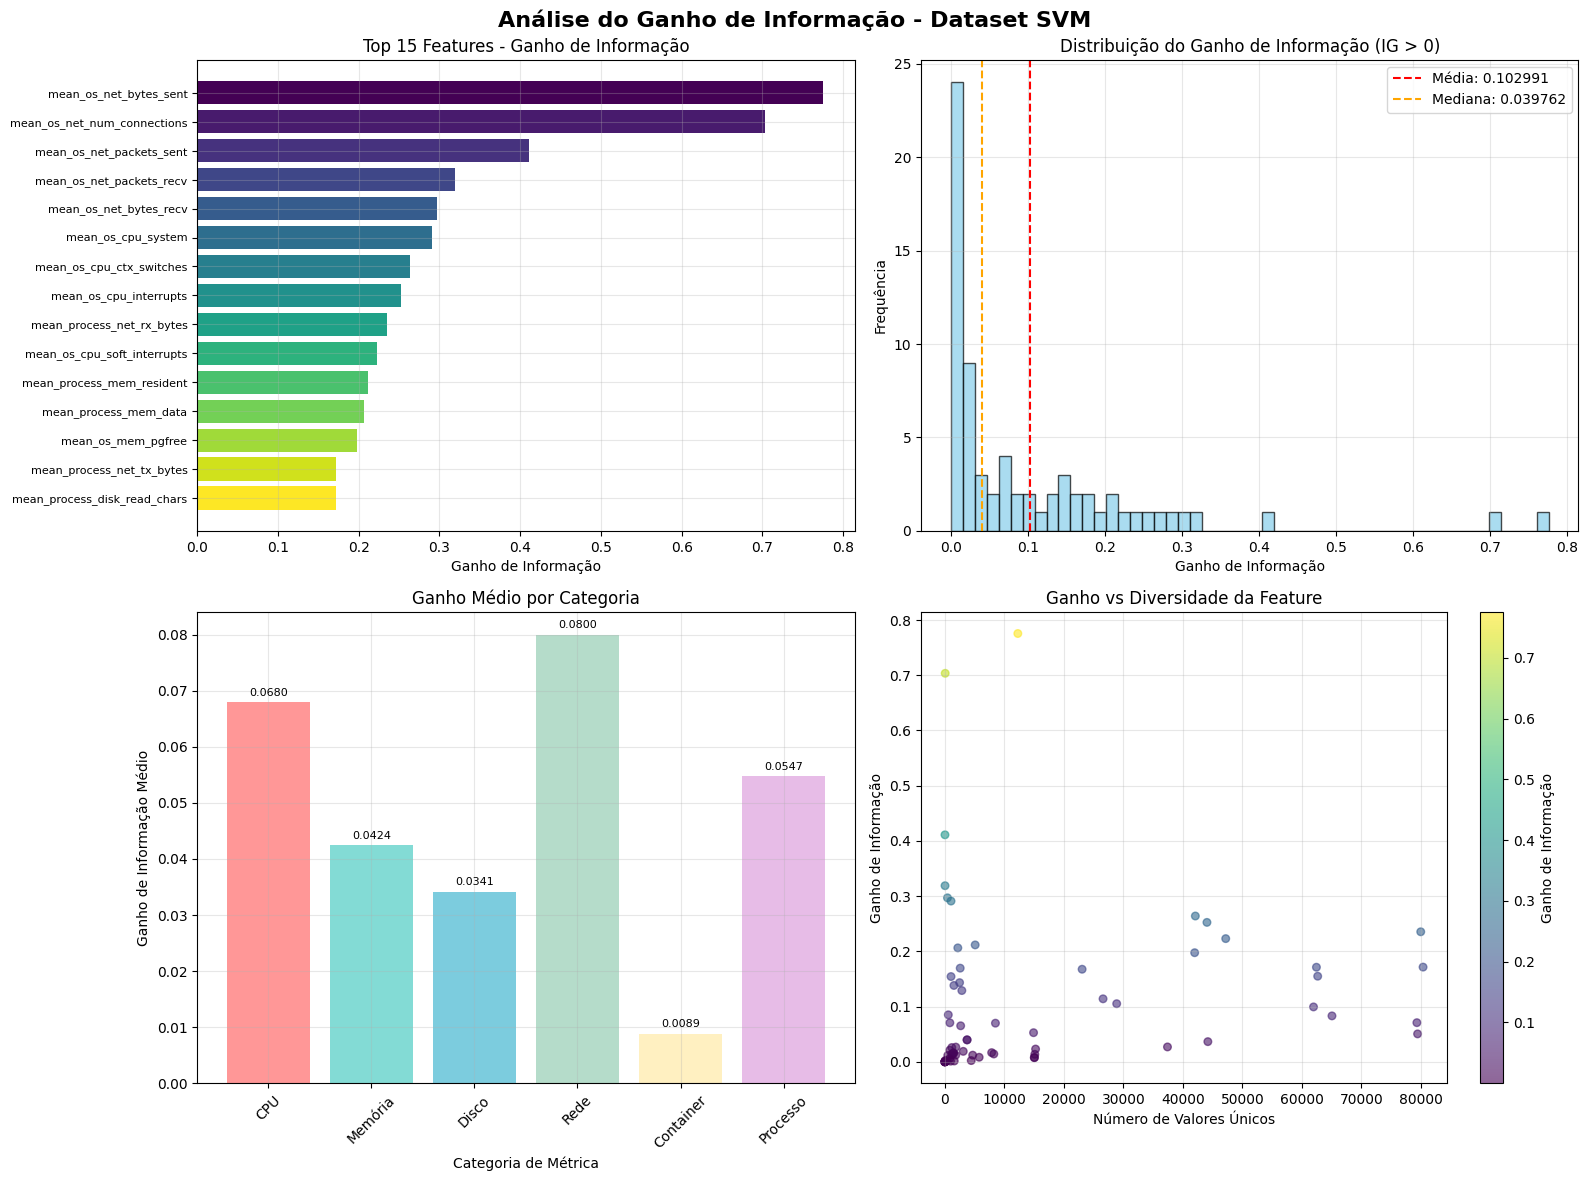

✅ Visualizações geradas com sucesso!


In [16]:
if df_resultados is not None:
    print("📊 Gerando visualizações dos resultados...")
    
    # Configurar figura com subplots
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Análise do Ganho de Informação - Dataset SVM', fontsize=16, fontweight='bold')
    
    # 1. Top 15 features
    ax1 = axes[0, 0]
    top_15 = df_resultados.head(15)
    bars = ax1.barh(range(len(top_15)), top_15['information_gain'], 
                    color=plt.cm.viridis(np.linspace(0, 1, len(top_15))))
    ax1.set_yticks(range(len(top_15)))
    ax1.set_yticklabels([f"{row['feature'][:30]}..." if len(row['feature']) > 30 
                        else row['feature'] for _, row in top_15.iterrows()], fontsize=8)
    ax1.set_xlabel('Ganho de Informação')
    ax1.set_title('Top 15 Features - Ganho de Informação')
    ax1.grid(True, alpha=0.3)
    ax1.invert_yaxis()
    
    # 2. Distribuição do ganho de informação
    ax2 = axes[0, 1]
    # Filtrar valores muito próximos de zero para melhor visualização
    ganhos_positivos = df_resultados[df_resultados['information_gain'] > 0]['information_gain']
    if len(ganhos_positivos) > 0:
        ax2.hist(ganhos_positivos, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
        ax2.axvline(ganhos_positivos.mean(), color='red', linestyle='--', 
                   label=f'Média: {ganhos_positivos.mean():.6f}')
        ax2.axvline(ganhos_positivos.median(), color='orange', linestyle='--', 
                   label=f'Mediana: {ganhos_positivos.median():.6f}')
        ax2.set_xlabel('Ganho de Informação')
        ax2.set_ylabel('Frequência')
        ax2.set_title('Distribuição do Ganho de Informação (IG > 0)')
        ax2.legend()
        ax2.grid(True, alpha=0.3)
    else:
        ax2.text(0.5, 0.5, 'Nenhum ganho > 0\nencontrado', 
                ha='center', va='center', transform=ax2.transAxes)
        ax2.set_title('Distribuição do Ganho de Informação')
    
    # 3. Ganho por categoria
    ax3 = axes[1, 0]
    categorias_stats = {}
    for categoria, rows in categorias.items():
        if rows:
            ganhos = [row['information_gain'] for row in rows]
            categorias_stats[categoria] = {
                'count': len(rows),
                'mean_gain': np.mean(ganhos),
                'max_gain': max(ganhos)
            }
    
    if categorias_stats:
        cats = list(categorias_stats.keys())
        means = [categorias_stats[cat]['mean_gain'] for cat in cats]
        
        bars = ax3.bar(cats, means, alpha=0.7, 
                      color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#DDA0DD'])
        ax3.set_xlabel('Categoria de Métrica')
        ax3.set_ylabel('Ganho de Informação Médio')
        ax3.set_title('Ganho Médio por Categoria')
        ax3.tick_params(axis='x', rotation=45)
        ax3.grid(True, alpha=0.3)
        
        # Adicionar valores nas barras
        for bar, mean in zip(bars, means):
            ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(means)*0.01,
                    f'{mean:.4f}', ha='center', va='bottom', fontsize=8)
    
    # 4. Scatter: Ganho vs Valores Únicos
    ax4 = axes[1, 1]
    # Filtrar dados válidos
    dados_validos = df_resultados[
        (df_resultados['information_gain'] > 0) & 
        (~df_resultados['valores_unicos'].isna()) &
        (df_resultados['valores_unicos'] > 0)
    ]
    
    if len(dados_validos) > 0:
        scatter = ax4.scatter(dados_validos['valores_unicos'], 
                            dados_validos['information_gain'],
                            alpha=0.6, s=30, c=dados_validos['information_gain'], 
                            cmap='viridis')
        ax4.set_xlabel('Número de Valores Únicos')
        ax4.set_ylabel('Ganho de Informação')
        ax4.set_title('Ganho vs Diversidade da Feature')
        ax4.grid(True, alpha=0.3)
        
        # Adicionar colorbar
        plt.colorbar(scatter, ax=ax4, label='Ganho de Informação')
    else:
        ax4.text(0.5, 0.5, 'Dados insuficientes\npara scatter plot', 
                ha='center', va='center', transform=ax4.transAxes)
        ax4.set_title('Ganho vs Diversidade da Feature')
    
    plt.tight_layout()
    plt.show()
    
    print("✅ Visualizações geradas com sucesso!")

else:
    print("❌ Não há dados para gerar visualizações")

## 7. Seleção de Features e Exportação

In [17]:
if df_resultados is not None:
    print("💾 Gerando seleções de features baseadas no Ganho de Informação...")
    
    # Definir diferentes critérios de seleção
    criterios = {
        'top_10': {'tipo': 'top_n', 'valor': 10, 'descricao': 'Top 10 features'},
        'top_25': {'tipo': 'top_n', 'valor': 25, 'descricao': 'Top 25 features'},
        'top_50': {'tipo': 'top_n', 'valor': 50, 'descricao': 'Top 50 features'},
        'threshold_001': {'tipo': 'threshold', 'valor': 0.001, 'descricao': 'IG >= 0.001'},
        'threshold_005': {'tipo': 'threshold', 'valor': 0.005, 'descricao': 'IG >= 0.005'},
        'threshold_01': {'tipo': 'threshold', 'valor': 0.01, 'descricao': 'IG >= 0.01'},
        'quartil_75': {'tipo': 'percentil', 'valor': 75, 'descricao': 'Top 25% (Quartil 75)'}
    }
    
    selecoes = {}
    
    print(f"\n📋 CRITÉRIOS DE SELEÇÃO DE FEATURES:")
    
    for nome, criterio in criterios.items():
        if criterio['tipo'] == 'top_n':
            n = min(criterio['valor'], len(df_resultados))
            features_selecionadas = df_resultados.head(n)['feature'].tolist()
            
        elif criterio['tipo'] == 'threshold':
            threshold = criterio['valor']
            features_selecionadas = df_resultados[
                df_resultados['information_gain'] >= threshold
            ]['feature'].tolist()
            
        elif criterio['tipo'] == 'percentil':
            percentil = criterio['valor']
            threshold_percentil = df_resultados['information_gain'].quantile(percentil/100)
            features_selecionadas = df_resultados[
                df_resultados['information_gain'] >= threshold_percentil
            ]['feature'].tolist()
        
        selecoes[nome] = features_selecionadas
        
        # Calcular estatísticas da seleção
        if features_selecionadas:
            ganhos_selecionados = df_resultados[
                df_resultados['feature'].isin(features_selecionadas)
            ]['information_gain']
            
            min_gain = ganhos_selecionados.min()
            max_gain = ganhos_selecionados.max()
            mean_gain = ganhos_selecionados.mean()
            
            print(f"   • {criterio['descricao']:20s}: {len(features_selecionadas):3d} features | "
                  f"IG: {min_gain:.6f} - {max_gain:.6f} (μ={mean_gain:.6f})")
        else:
            print(f"   • {criterio['descricao']:20s}:   0 features (critério muito restritivo)")
    
    # Salvar resultados
    print(f"\n💾 SALVANDO RESULTADOS:")
    
    # 1. Salvar ranking completo
    arquivo_ranking = 'ganho_informacao_ranking_completo.csv'
    df_resultados.to_csv(arquivo_ranking, index=False)
    print(f"   ✅ Ranking completo: {arquivo_ranking}")
    
    # 2. Salvar listas de features selecionadas
    for nome, features_list in selecoes.items():
        if features_list:
            arquivo_features = f'features_selecionadas_{nome}.txt'
            with open(arquivo_features, 'w', encoding='utf-8') as f:
                f.write(f"# Features selecionadas: {criterios[nome]['descricao']}\n")
                f.write(f"# Total: {len(features_list)} features\n")
                f.write(f"# Gerado em: {pd.Timestamp.now()}\n\n")
                
                for i, feature in enumerate(features_list, 1):
                    ganho = df_resultados[df_resultados['feature'] == feature]['information_gain'].iloc[0]
                    f.write(f"{i:3d}. {feature:<60} # IG: {ganho:.8f}\n")
            
            print(f"   ✅ {criterios[nome]['descricao']:20s}: {arquivo_features}")
    
    # 3. Gerar resumo executivo
    arquivo_resumo = 'resumo_ganho_informacao.txt'
    with open(arquivo_resumo, 'w', encoding='utf-8') as f:
        f.write("=" * 70 + "\n")
        f.write("RESUMO EXECUTIVO - GANHO DE INFORMAÇÃO\n")
        f.write("Dataset: svm.csv\n")
        f.write(f"Gerado em: {pd.Timestamp.now()}\n")
        f.write("=" * 70 + "\n\n")
        
        f.write(f"ESTATÍSTICAS GERAIS:\n")
        f.write(f"• Total de features analisadas: {len(df_resultados)}\n")
        f.write(f"• Features com IG > 0: {(df_resultados['information_gain'] > 0).sum()}\n")
        f.write(f"• Ganho máximo: {df_resultados['information_gain'].max():.8f}\n")
        f.write(f"• Ganho médio: {df_resultados['information_gain'].mean():.8f}\n")
        f.write(f"• Entropia do target: {entropia_target:.6f} bits\n\n")
        
        f.write(f"TOP 10 FEATURES:\n")
        for i, (_, row) in enumerate(df_resultados.head(10).iterrows(), 1):
            f.write(f"{i:2d}. {row['feature']:<50} | IG: {row['information_gain']:.8f}\n")
        
        f.write(f"\nRECOMENDAÇÕES:\n")
        q75_threshold = df_resultados['information_gain'].quantile(0.75)
        features_q75 = (df_resultados['information_gain'] >= q75_threshold).sum()
        f.write(f"• Para feature selection conservadora: usar {features_q75} features (IG >= {q75_threshold:.8f})\n")
        
        if len(selecoes['top_25']) > 0:
            f.write(f"• Para feature selection balanceada: usar Top 25 features\n")
        
        f.write(f"• Validar seleção com cross-validation no modelo final\n")
    
    print(f"   ✅ Resumo executivo: {arquivo_resumo}")
    
    print(f"\n🎉 Análise de Ganho de Informação concluída com sucesso!")
    print(f"📁 Arquivos gerados: {len(selecoes) + 2} arquivos")

else:
    print("❌ Não é possível gerar seleções sem resultados")

💾 Gerando seleções de features baseadas no Ganho de Informação...

📋 CRITÉRIOS DE SELEÇÃO DE FEATURES:
   • Top 10 features     :  10 features | IG: 0.223096 - 0.775553 (μ=0.377211)
   • Top 25 features     :  25 features | IG: 0.099422 - 0.775553 (μ=0.244270)
   • Top 50 features     :  50 features | IG: 0.013038 - 0.775553 (μ=0.140631)
   • IG >= 0.001         :  62 features | IG: 0.001163 - 0.775553 (μ=0.114608)
   • IG >= 0.005         :  57 features | IG: 0.005528 - 0.775553 (μ=0.124499)
   • IG >= 0.01          :  53 features | IG: 0.011635 - 0.775553 (μ=0.133345)
   • Top 25% (Quartil 75):  31 features | IG: 0.065256 - 0.775553 (μ=0.211350)

💾 SALVANDO RESULTADOS:
   ✅ Ranking completo: ganho_informacao_ranking_completo.csv
   ✅ Top 10 features     : features_selecionadas_top_10.txt
   ✅ Top 25 features     : features_selecionadas_top_25.txt
   ✅ Top 50 features     : features_selecionadas_top_50.txt
   ✅ IG >= 0.001         : features_selecionadas_threshold_001.txt
   ✅ IG >= 0

---

## 🎯 Resumo Final

Este notebook implementou o cálculo puro do **Ganho de Informação** baseado na teoria da informação:

### ✅ Funcionalidades Implementadas:
1. **Cálculo de Entropia** usando a fórmula clássica H(S) = -Σ p(i) × log₂(p(i))
2. **Discretização de Features Contínuas** para aplicação do conceito de ganho de informação
3. **Ganho de Informação Puro** usando IG(S,A) = H(S) - Σ(|Sv|/|S|) × H(Sv)
4. **Ranking Completo** de todas as features por importância
5. **Múltiplos Critérios** de seleção de features
6. **Visualizações Detalhadas** dos resultados
7. **Exportação de Resultados** em múltiplos formatos

### 📊 Arquivos Gerados:
- `ganho_informacao_ranking_completo.csv` - Ranking completo com estatísticas
- `features_selecionadas_*.txt` - Listas de features por critério
- `resumo_ganho_informacao.txt` - Resumo executivo

### 💡 Próximos Passos:
1. Utilizar as features selecionadas no treinamento do modelo SVM
2. Comparar desempenho entre diferentes seleções
3. Validar resultados com cross-validation
4. Considerar ensemble de diferentes seleções de features